# This notebook allows to generate the custom set from the given folder with depths and RGBs.

## It was performed for Sintel, to use for any other data, new functions should be accomplished.

# Transforming images from RGB/Depth to .pth 
## (MSGNet inputs)

In [2]:
from tqdm import tqdm
from utils.dataset_loader import Sintel
import torch as th
from os.path import join as pathJoin
%load_ext autoreload
%autoreload 2

num_crops = 4
m = 3

# These two folders below are given by Sintel authors.
path2images = './../DATASETS/Sintel/training_images/training/final/'
path2depths = './../DATASETS/Sintel/depth_training_20150305/training/depth/'

sintel = Sintel(path2images, path2depths, m=m, mode='train', 
                sample_mode='full', get_name=True, size=None)

path2exp_folder = './../DATASETS/Sintel/all_scales_freqs_training_set/' # As an advice, do all the data preparation once

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
num_train = 863 # why not? (there is a border between two scenes in a Sintel set)
num_val = len(sintel) - num_train

train_range = range(num_train)
val_range = range(num_train, num_train+num_val)

for mode, mode_range in zip(['train', 'val'], [train_range, val_range]):
    path2mode_folder = pathJoin(path2exp_folder, mode)
    
    for i in tqdm(mode_range):
        for crop_ind in range(1, num_crops+1):
            Y, Y_hf, dict_Dx_lf, dict_Dx_hf, name = sintel[i]
            file_name = name+'_'+str(crop_ind)+'.pth'
            path2Y = pathJoin(path2mode_folder, 'Y', file_name)
            th.save(Y, path2Y)
            path2Y_hf = pathJoin(path2mode_folder, 'Y_hf', file_name)
            th.save(th.FloatTensor(Y_hf)[None,...], path2Y_hf)
            for scale in map(str, [1,2,4,8]):  ## through all elements in dicts
                for d, freq in zip([dict_Dx_lf, dict_Dx_hf], ['lf', 'hf']):
                    abs_path = pathJoin(path2mode_folder, 'Dx'+scale+'_'+freq, file_name)
                    th.save(th.FloatTensor(d[int(scale)])[None,...], abs_path)


100%|██████████| 201/201 [00:14<00:00, 13.45it/s]


# Test. What lies in each folder

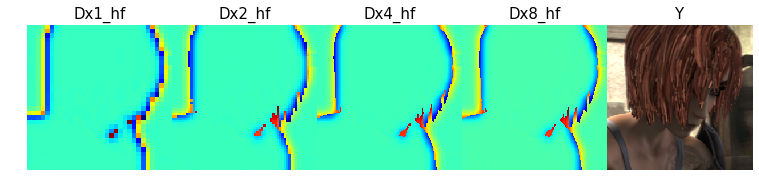

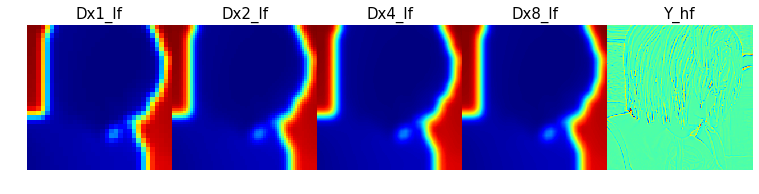

In [122]:
from glob import glob
from utils.utils import show

fullpath = pathJoin(path2exp_folder, 'train')
paths_of_folders = sorted(glob(fullpath+'/*'))
names_of_folders = [path[len(fullpath)+1:] for path in paths_of_folders]
imgs = [th.load(path+'/alley_1_frame_0001_2'+'.pth') for path in paths_of_folders]

show(imgs[0::2], titles=names_of_folders[0::2])
show(imgs[1::2], titles=names_of_folders[1::2])

# Test. How dataset works

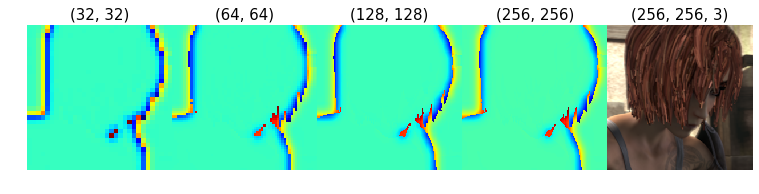

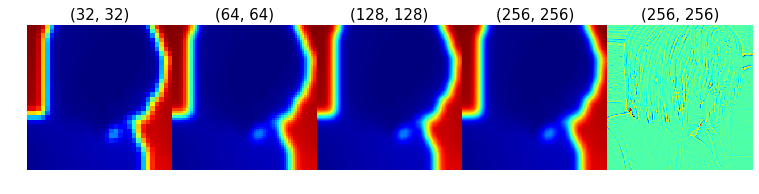

In [123]:
from utils.dataset_loader import Sintel_FullTraining

dataset = Sintel_FullTraining(num_images=2, get_name=True)

show(dataset[1][:-1][0::2], titles='shapes')
show(dataset[1][:-1][1::2], titles='shapes')